# Notebook to Generate Bathymetry and Current Data for snells_law_verfication.ipynb

## General Setup

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [24]:
NX = 300
NY = 150
dl = 50
xs = np.arange(0, NX*dl, dl, dtype=np.float64)
ys = np.arange(0, NY*dl, dl, dtype=np.float64)
base_array = np.ones((NY, NX), dtype=np.float64)

## Step Bathymetry

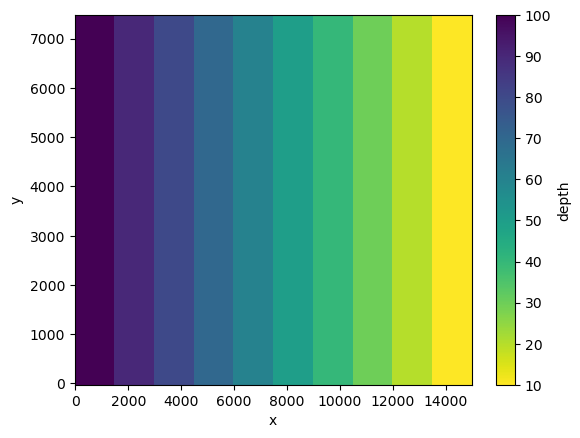

In [33]:
n_shelfs = 10
depth_max = 100
d_depth = 10

# Create descending order 1D array of depths for each x coordinate
depths_x = depth_max - np.floor(np.linspace(0, n_shelfs, NX, endpoint=False))*d_depth

step_bathymetry_array = depths_x * base_array
step_bathymetry_ds = xr.Dataset(data_vars={'depth': (('y', 'x'), step_bathymetry_array)},
                           coords={'x': ('x', xs), 'y': ('y', ys)})
# Plot bathymetry to double check
step_bathymetry_ds.depth.plot(cmap='viridis_r')

In [34]:
step_bathymetry_ds.to_netcdf('data/step_bathymetry.nc', format='NETCDF3_CLASSIC')

## Null Current Field

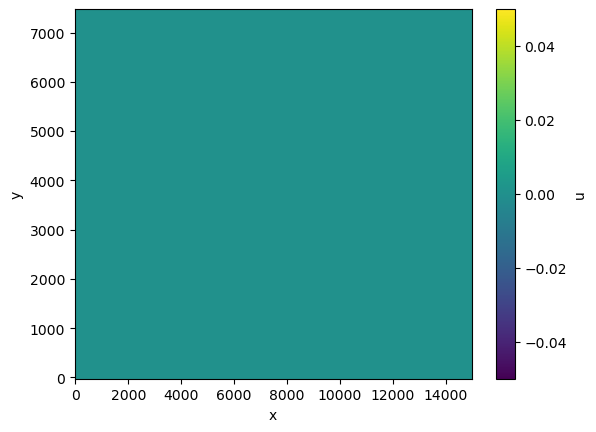

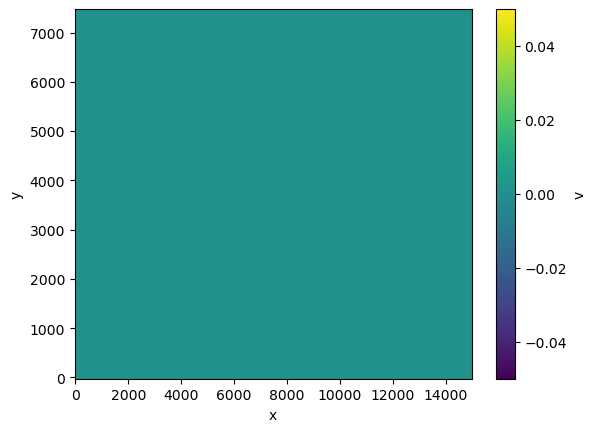

In [27]:
u_array = base_array*0
v_array = base_array*0

null_current_ds = xr.Dataset(data_vars={'u': (('y', 'x'), u_array), 'v': (('y', 'x'), v_array)},
                             coords={'x': ('x', xs), 'y': ('y', ys)})

# Plot currents to double check
null_current_ds.u.plot()
plt.show()
null_current_ds.v.plot()
plt.show()

In [28]:
null_current_ds.to_netcdf('data/null_current.nc', format='NETCDF3_CLASSIC')

## Flat Deep Water Bathymetry

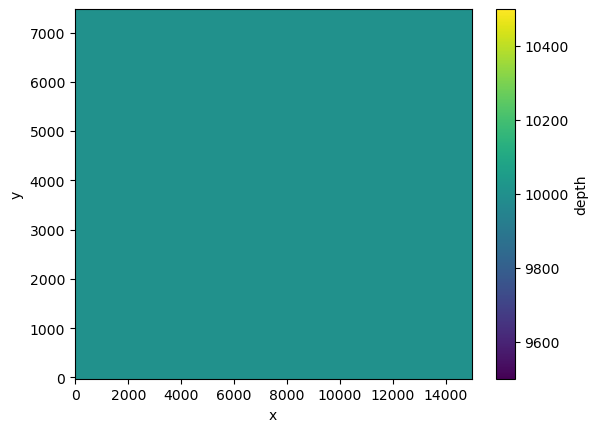

In [29]:
flat_depth = 10_000 # Sufficiently Deep no wave should feel the bottom
flat_bathymetry_array = flat_depth * base_array
flat_bathymetry_ds = xr.Dataset(data_vars={'depth': (('y', 'x'), flat_bathymetry_array)},
                           coords={'x': ('x', xs), 'y': ('y', ys)})

# Plot Bathymetry to double check
flat_bathymetry_ds.depth.plot()

In [30]:
flat_bathymetry_ds.to_netcdf('data/deep_water_flat_bathymetry.nc', format='NETCDF3_CLASSIC')

## Shear Currents

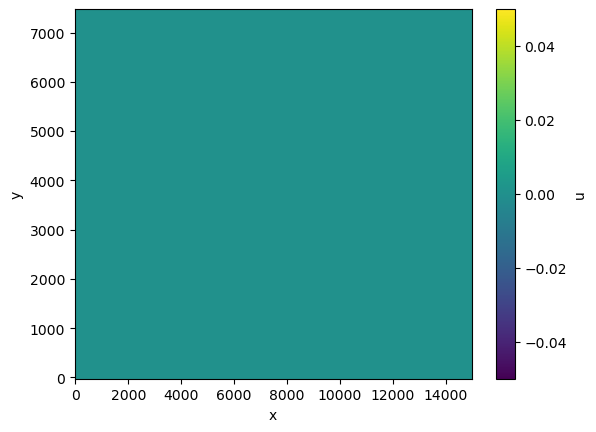

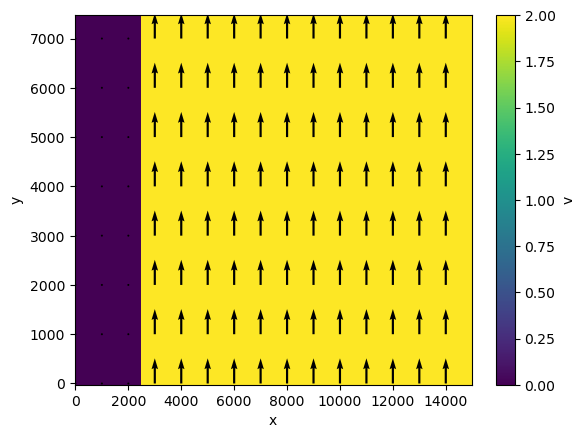

In [31]:
U = 0
V = 2

u_array = base_array*U
v_array = base_array*0
v_array[:, NX//6:] = V

shear_current_ds = xr.Dataset(data_vars={'u': (('y', 'x'), u_array), 'v': (('y', 'x'), v_array)},
                           coords={'x': ('x', xs), 'y': ('y', ys)})

# Plot currents to double check
shear_current_ds.u.plot()
plt.show()
spaced_shear_current_ds = shear_current_ds.sel(x=slice(None,None,20), y=slice(None,None,20))
fig, ax = plt.subplots()
shear_current_ds.v.plot(ax=ax)
ax.quiver(spaced_shear_current_ds.x, spaced_shear_current_ds.y, spaced_shear_current_ds.u, spaced_shear_current_ds.v)

In [32]:
shear_current_ds.to_netcdf('data/shear_current_2v.nc', format='NETCDF3_CLASSIC')